In [19]:
import pandas as pd
import numpy as np

# Replacing -999 with NaN in HURDAT2

In [20]:
df_hurdat2 = pd.read_csv('datasets/hurdat2_formatted.csv')
df_hurdat2['datetime'] = pd.to_datetime(df_hurdat2['datetime'])
df_hurdat2.replace(-999, np.nan, inplace=True)
df_hurdat2.head(5)

,storm_id,storm_name,num_of_obs,datetime,category,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,...,34_kt_nw_nm,50_kt_ne_nm,50_kt_se_nm,50_kt_sw_nm,50_kt_nw_nm,64_kt_ne_nm,64_kt_se_nm,64_kt_sw_nm,64_kt_nw_nm,radius_of_max_wind_nm
0,AL041851,UNNAMED,49,1851-08-23 12:00:00,3,NaN,HU,28.5,-86.6,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL041851,UNNAMED,49,1851-08-23 18:00:00,3,NaN,HU,29.6,-86.1,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL041851,UNNAMED,49,1851-08-23 21:00:00,3,L,HU,30.1,-85.7,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL041851,UNNAMED,49,1851-08-24 00:00:00,2,NaN,HU,30.7,-85.1,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL011852,UNNAMED,45,1852-08-26 18:00:00,1,NaN,HU,31.2,-88.1,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Grouping HURDAT2 by storm_id

In [21]:
grouped_df = df_hurdat2.groupby(['storm_id']).agg({
    'maximum_sustained_wind_knots': ['mean', 'max'],
    'central_pressure_mb': ['mean', 'min'],
    'radius_of_max_wind_nm': ['mean', 'max']
}).reset_index()
print("Number of unique storms:", len(grouped_df))

grouped_df_without_nan = grouped_df.dropna()

print("Number of unique storms without NaN:", len(grouped_df_without_nan))

Number of unique storms: 287
Number of unique storms without NaN: 72


In [22]:
grouped_df_without_nan.head(5)

storm_id maximum_sustained_wind_knots     central_pressure_mb         \
                                     mean max                mean    min   
15  AL011915                    52.142857  65               996.5  990.0   
19  AL011926                    70.000000  90               967.0  967.0   
20  AL011928                    50.666667  90               977.0  977.0   
28  AL011966                    76.666667  90               975.5  970.0   
45  AL021899                    65.625000  85               979.0  979.0   

   radius_of_max_wind_nm        
                    mean   max  
15                  15.0  15.0  
19                  15.0  15.0  
20                  10.0  10.0  
28                  30.0  30.0  
45                  10.0  10.0

In [23]:
grouped_df_without_nan.to_csv('datasets/hurdat2_grouped.csv', index=False)

# Classifying storms into categories

In [24]:
def  classify_category(wind_speed):
    if wind_speed <= 33:
        return "Tropical Depression"
    elif 34 <= wind_speed <= 63:
        return "Tropical Storm"
    elif 64 <= wind_speed <= 82:
        return 1
    elif 83 <= wind_speed <= 95:
        return 2
    elif 96 <= wind_speed <= 112:
        return 3
    elif 113 <= wind_speed <= 136:
        return 4
    elif wind_speed >= 137:
        return 5
    return "Unknown"

In [25]:
grouped_df_without_nan['category'] = grouped_df_without_nan['maximum_sustained_wind_knots']['max'].apply(classify_category)
grouped_df['category'] = grouped_df['maximum_sustained_wind_knots']['max'].apply(classify_category)

C:\Users\jaych\AppData\Local\Temp\ipykernel_87464\25845270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df_without_nan['category'] = grouped_df_without_nan['maximum_sustained_wind_knots']['max'].apply(classify_category)


In [26]:
grouped_df_without_nan.head(5)

storm_id maximum_sustained_wind_knots     central_pressure_mb         \
                                     mean max                mean    min   
15  AL011915                    52.142857  65               996.5  990.0   
19  AL011926                    70.000000  90               967.0  967.0   
20  AL011928                    50.666667  90               977.0  977.0   
28  AL011966                    76.666667  90               975.5  970.0   
45  AL021899                    65.625000  85               979.0  979.0   

   radius_of_max_wind_nm       category  
                    mean   max           
15                  15.0  15.0        1  
19                  15.0  15.0        2  
20                  10.0  10.0        2  
28                  30.0  30.0        2  
45                  10.0  10.0        2

# Exploring resource dataset

In [27]:
df_resource = pd.read_csv('datasets/resource_dataset_with_category.csv')

Adding storm_id to resource data

In [28]:
df_hurdat2['year'] = df_hurdat2['datetime'].dt.year.astype(str)
df_resource['year'] = df_resource['year'].astype(str)
df_hurdat2_unique = df_hurdat2.drop_duplicates(subset=['storm_name', 'year', 'storm_id'])
df_resources_with_id = df_resource.merge(
    df_hurdat2_unique[['storm_id', 'year', 'storm_name']], on=['storm_name', 'year'], how='left')

In [29]:
df_resources_with_id.head(5)

,storm_name,category,year,shelters,meals,water_gallons,fuel_gallons,storm_id
0,CHARLEY,3,2004,250,2000000,300000,100000,AL032004
1,FRANCES,3,2004,250,3500000,1500000,200000,AL062004
2,IVAN,3,2004,120,2000000,700000,200000,AL092004
3,JEANNE,-1,2004,200,4000000,1500000,200000,AL112004
4,DENNIS,-1,2005,70,1000000,500000,100000,AL042005


Dropping storms from resource data that are not in HURDAT2 grouped data without missing values

In [30]:
df_resources_with_id['exists_in_hurdat2'] = df_resources_with_id['storm_id'].isin(grouped_df_without_nan['storm_id'])
df_resources_with_id = df_resources_with_id[df_resources_with_id['exists_in_hurdat2']]
df_resources_with_id = df_resources_with_id.drop(columns=['exists_in_hurdat2'])

In [31]:
df_resources_with_id.head(5)

,storm_name,category,year,shelters,meals,water_gallons,fuel_gallons,storm_id
0,CHARLEY,3,2004,250,2000000,300000,100000,AL032004
1,FRANCES,3,2004,250,3500000,1500000,200000,AL062004
2,IVAN,3,2004,120,2000000,700000,200000,AL092004
3,JEANNE,-1,2004,200,4000000,1500000,200000,AL112004
4,DENNIS,-1,2005,70,1000000,500000,100000,AL042005


Unnesting the nested mean/max columns

In [32]:
df_resources_with_id.to_csv('datasets/resource_dataset_with_id_category.csv', index=False)

In [33]:
grouped_df_selected = grouped_df_without_nan[[
    ('storm_id', ''),
    ('maximum_sustained_wind_knots', 'max'),
    ('maximum_sustained_wind_knots', 'mean'),
    ('central_pressure_mb', 'min'),
    ('central_pressure_mb', 'mean'),
    ('radius_of_max_wind_nm', 'max'),
    ('radius_of_max_wind_nm', 'mean')]]

grouped_df_selected.columns =  [
    'storm_id',
    'maximum_sustained_wind_knots_max',
    'maximum_sustained_wind_knots_mean',
    'central_pressure_mb_min',
    'central_pressure_mb_mean',
    'radius_of_max_wind_nm_max',
    'radius_of_max_wind_nm_mean']

In [34]:
grouped_df_selected.head(5)

,storm_id,maximum_sustained_wind_knots_max,maximum_sustained_wind_knots_mean,central_pressure_mb_min,central_pressure_mb_mean,radius_of_max_wind_nm_max,radius_of_max_wind_nm_mean
15,AL011915,65,52.142857,990.0,996.5,15.0,15.0
19,AL011926,90,70.000000,967.0,967.0,15.0,15.0
20,AL011928,90,50.666667,977.0,977.0,10.0,10.0
28,AL011966,90,76.666667,970.0,975.5,30.0,30.0
45,AL021899,85,65.625000,979.0,979.0,10.0,10.0


Adding the unnested columns to resource data

In [35]:
df_resources_with_storm_features = df_resources_with_id.merge(
    grouped_df_selected, on='storm_id', how='left')

In [36]:
df_resources_with_storm_features.to_csv('datasets/resource_dataset_with_id_category_storm_features.csv', index=False)

Graphs to check distribution of data

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

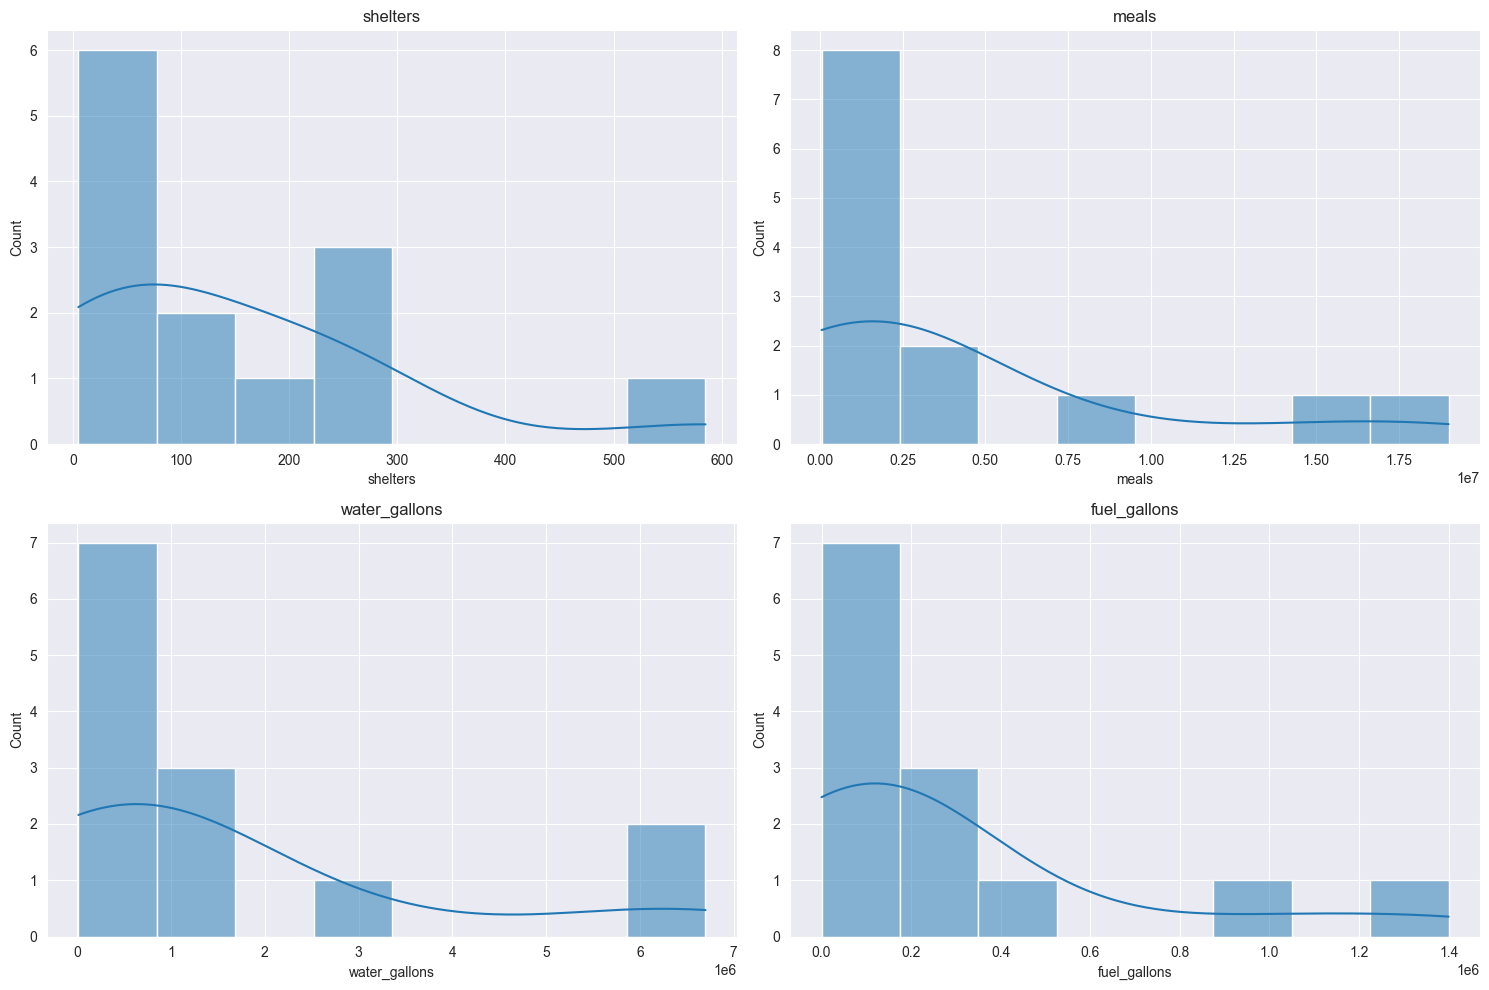

In [38]:
columns_hurricane_features = list(df_resources_with_storm_features.columns[8:])
columns_to_show = list(df_resources_with_storm_features.columns[3:7])

num_of_features = len(columns_to_show)

num_rows = int(np.ceil(num_of_features / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_show):
    sns.histplot(df_resources_with_storm_features[column], ax=axes[i], kde=True, bins=8)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

# Checking Skewness and Kurtosis (Tail Heaviness)

In [39]:
for col in columns_to_show:
    skewness = df_resources_with_storm_features[col].skew()
    kurtosis = df_resources_with_storm_features[col].kurtosis()
    print("Feature: ", col)
    print("\tskewness: ", skewness)
    print("\tkurtosis: ", kurtosis)
    print("\n")

Feature:  shelters
	skewness:  1.7204261117288742
	kurtosis:  3.5914377187123265


Feature:  meals
	skewness:  1.766241057547565
	kurtosis:  2.210347416165002


Feature:  water_gallons
	skewness:  1.6712057789479693
	kurtosis:  1.6999285058866866


Feature:  fuel_gallons
	skewness:  1.984894843635049
	kurtosis:  3.261261168115683




# Generate data using Gamma distribution on this small resource dataset

Generate data using gamma distribution

In [40]:
from scipy.stats import gamma

resource_data_gamma = {}

for col in columns_to_show:
    subset_df = df_resources_with_storm_features[col]
    alpha_1, loc, beta_1 = gamma.fit(subset_df)
    resource_data_gamma[col] = gamma.rvs(alpha_1, scale=beta_1, size=800)

Verify synthesized data using Kolmogorov-Smirnov test

In [41]:
from scipy.stats import kstest

def kolmogorov_smirnov(columns, real_data, synthesized_data):
    for col1 in columns:
        ks_stat, ks_p = kstest(
            synthesized_data[col1],
            real_data[col1],
        )
        print(f"Kolmogorov-Smirnov test for '{col1}': Stats={ks_stat} | p={ks_p}")
        print("\n")

kolmogorov_smirnov(columns_to_show, df_resources_with_storm_features, resource_data_gamma)

Kolmogorov-Smirnov test for 'shelters': Stats=0.1921153846153846 | p=0.6641305588620162


Kolmogorov-Smirnov test for 'meals': Stats=0.13288461538461538 | p=0.9549254932218652


Kolmogorov-Smirnov test for 'water_gallons': Stats=0.15326923076923077 | p=0.880233346706232


Kolmogorov-Smirnov test for 'fuel_gallons': Stats=0.25548076923076923 | p=0.31706116101839116




Verify synthesized data using Anderson-Darling test

In [42]:
from scipy.stats import anderson_ksamp

def anderson_darling(columns, real_data, synthesized_data):
    for col in columns:
        ad_test = anderson_ksamp([real_data[col], synthesized_data[col]])
        ad_stat, ad_critical, ad_significance = ad_test.statistic, ad_test.critical_values, ad_test.significance_level

        print(f"AD Test for {col}:")
        print(f"  Statistic = {ad_stat:.4f}")
        print(f"  Critical Values = {ad_critical}")
        print(f"  Significance Levels = {ad_significance}\n")

anderson_darling(columns_to_show, df_resources_with_storm_features, resource_data_gamma)

AD Test for shelters:
  Statistic = -0.6799
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.25

AD Test for meals:
  Statistic = -0.6934
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.25

AD Test for water_gallons:
  Statistic = -0.4076
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.25

AD Test for fuel_gallons:
  Statistic = 1.2698
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.0974276803385125



C:\Users\jaych\AppData\Local\Temp\ipykernel_87464\4287727591.py:5: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_test = anderson_ksamp([real_data[col], synthesized_data[col]])


Verifying using Akaike Information Criterion (AIC)

In [43]:
from scipy.stats import gamma
import numpy as np

def compute_aic(data, dist_name, params):
    """Computes AIC for a given dataset and distribution."""
    likelihood = np.sum(dist_name.logpdf(data, *params))  # Log-likelihood
    k = len(params)  # Number of parameters
    return 2 * k - 2 * likelihood  # AIC formula

def AIC_gamma(columns, real_data, synthesized_data):
    aic_results = {}
    for col1 in columns:
        gamma_real_data = compute_aic(real_data[col1], gamma, gamma.fit(real_data[col1]))
        gamma_synthesized_data = compute_aic(synthesized_data[col1], gamma, gamma.fit(synthesized_data[col1]))

        aic_results[col1] = {
        'AIC Original Gamma': gamma_real_data,
        'AIC Synthetic Gamma': gamma_synthesized_data,
    }

    for col1, result in aic_results.items():
        print(f"AIC Results for {col1}:")
        for key, value in result.items():
            print(f"  {key}: {value:.2f}")
    print("\n")

AIC_gamma(columns_to_show, df_resources_with_storm_features, resource_data_gamma)

AIC Results for shelters:
  AIC Original Gamma: 150.40
  AIC Synthetic Gamma: 9212.12
AIC Results for meals:
  AIC Original Gamma: 387.48
  AIC Synthetic Gamma: inf
AIC Results for water_gallons:
  AIC Original Gamma: 379.83
  AIC Synthetic Gamma: inf
AIC Results for fuel_gallons:
  AIC Original Gamma: 246.39
  AIC Synthetic Gamma: inf




# Generate data using Log-Normal distribution

In [44]:
from scipy.stats import lognorm

resource_data_lognorm = {}

for col in columns_to_show:
    subset_df = df_resources_with_storm_features[col]
    shape, loc, scale = lognorm.fit(subset_df, method='mm')
    resource_data_lognorm[col] = lognorm.rvs(s=shape, loc=loc, scale=scale, size=800)

In [45]:
kolmogorov_smirnov(columns_to_show, df_resources_with_storm_features, resource_data_lognorm)

Kolmogorov-Smirnov test for 'shelters': Stats=0.46153846153846156 | p=0.005170392117771478


Kolmogorov-Smirnov test for 'meals': Stats=0.6153846153846154 | p=3.497832984124218e-05


Kolmogorov-Smirnov test for 'water_gallons': Stats=0.6153846153846154 | p=3.497832984124218e-05


Kolmogorov-Smirnov test for 'fuel_gallons': Stats=0.28048076923076926 | p=0.22036840418036469




In [46]:
anderson_darling(columns_to_show, df_resources_with_storm_features, resource_data_lognorm)

AD Test for shelters:
  Statistic = 12.6944
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.001

AD Test for meals:
  Statistic = 29.9986
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.001

AD Test for water_gallons:
  Statistic = 30.0630
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.001

AD Test for fuel_gallons:
  Statistic = 0.1666
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.25



C:\Users\jaych\AppData\Local\Temp\ipykernel_87464\4287727591.py:5: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_test = anderson_ksamp([real_data[col], synthesized_data[col]])
C:\Users\jaych\AppData\Local\Temp\ipykernel_87464\4287727591.py:5: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_test = anderson_ksamp([real_data[col], synthesized_data[col]])


In [47]:
from scipy.stats import lognorm

def AIC_lognorm(columns, real_data, synthesized_data):
    aic_results = {}
    for col1 in columns:
        lognorm_real_data = compute_aic(real_data[col1], lognorm, lognorm.fit(real_data[col1]))
        lognorm_synthesized_data = compute_aic(synthesized_data[col1], lognorm, lognorm.fit(synthesized_data[col1]))

        aic_results[col1] = {
        'AIC Original Lognorm': lognorm_real_data,
        'AIC Synthetic Lognorm': lognorm_synthesized_data,
    }

    for col1, result in aic_results.items():
        print(f"AIC Results for {col1}:")
        for key, value in result.items():
            print(f"  {key}: {value:.2f}")
    print("\n")

AIC_lognorm(columns_to_show, df_resources_with_storm_features, resource_data_lognorm)

AIC Results for shelters:
  AIC Original Lognorm: 140.85
  AIC Synthetic Lognorm: 8478.77
AIC Results for meals:
  AIC Original Lognorm: 397.58
  AIC Synthetic Lognorm: -7729.70
AIC Results for water_gallons:
  AIC Original Lognorm: 375.28
  AIC Synthetic Lognorm: -4174.03
AIC Results for fuel_gallons:
  AIC Original Lognorm: -2519.86
  AIC Synthetic Lognorm: 27071.46




C:\RIT\Spring 2025\788 Capstone\Lets_Go\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6911: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\RIT\Spring 2025\788 Capstone\Lets_Go\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\RIT\Spring 2025\788 Capstone\Lets_Go\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6902: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


# Divide resource dataset based on a good hurricane resource

Checking histogram for each hurricane feature

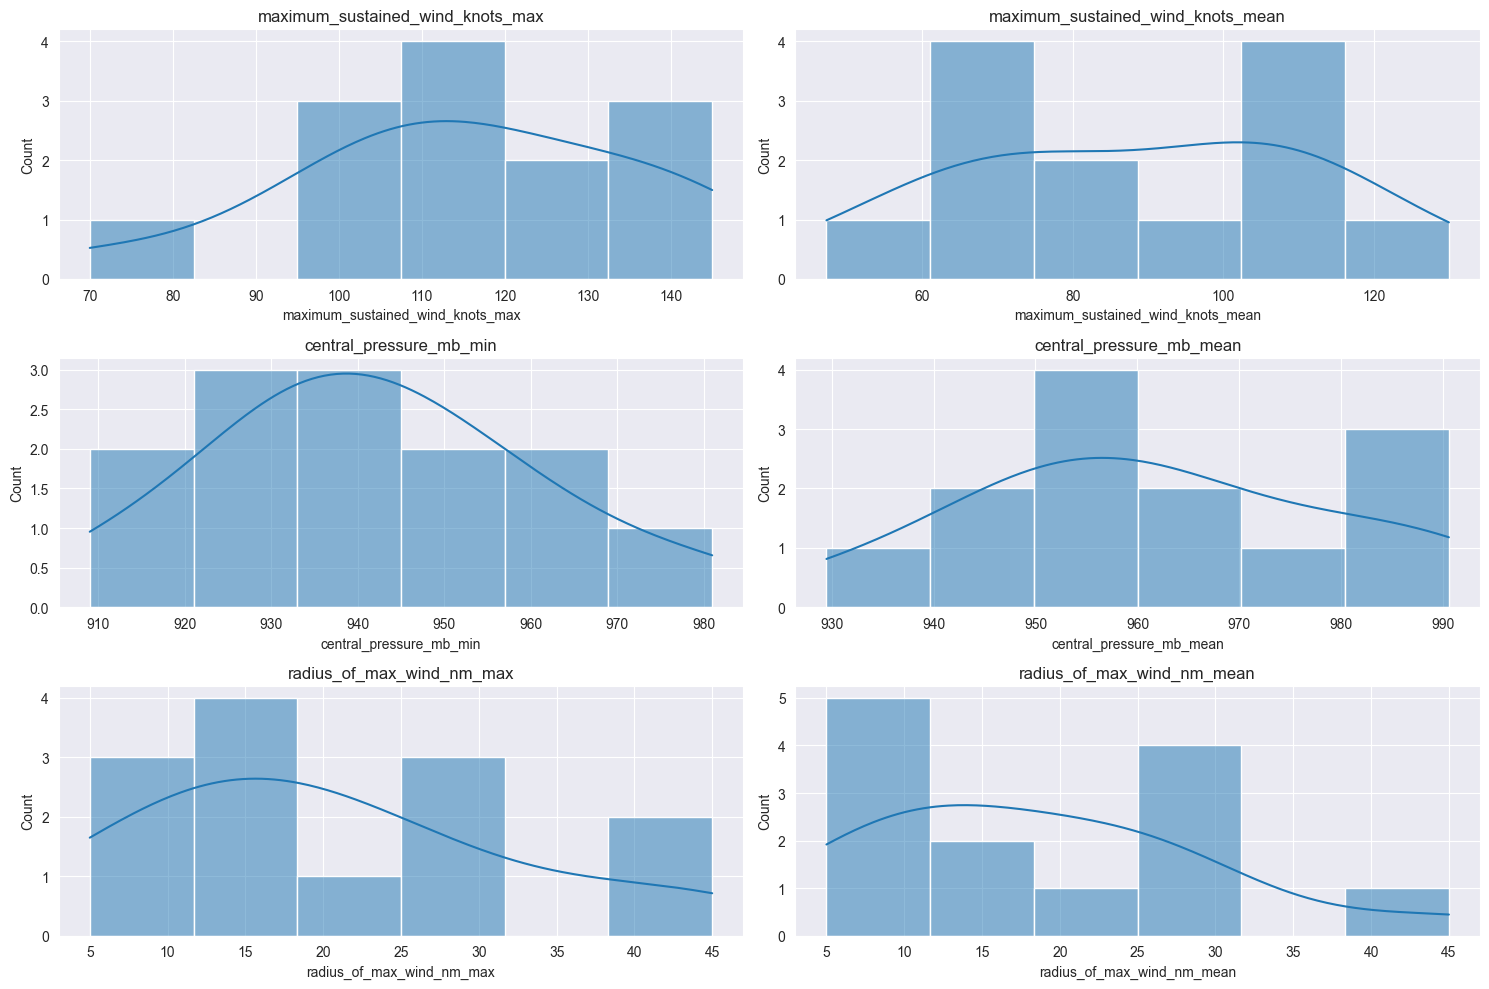

In [48]:
columns_hurricane_features = list(df_resources_with_storm_features.columns[8:])

num_of_features = len(columns_hurricane_features)

num_rows = int(np.ceil(num_of_features / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_hurricane_features):
    sns.histplot(df_resources_with_storm_features[column], ax=axes[i], kde=True, bins=6)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Checking Pearson's Correlation of features

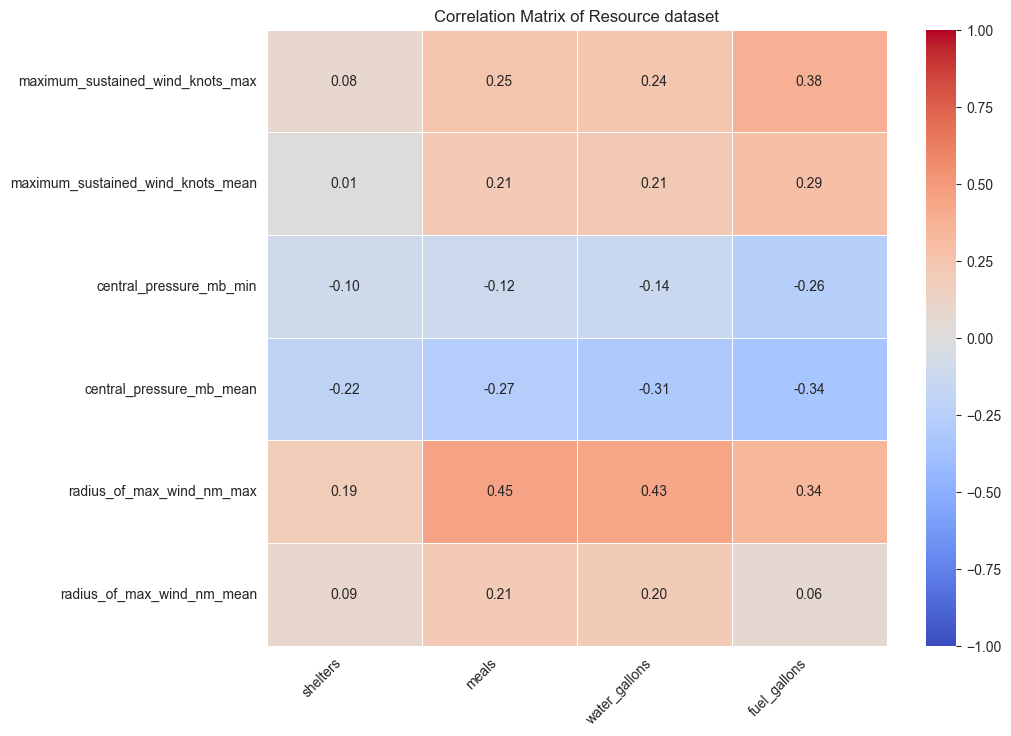

In [49]:
hurricane_features = list(df_resources_with_storm_features.columns[8:])
resource_features = list(df_resources_with_storm_features.columns[3:7])


corr_matrix = df_resources_with_storm_features[hurricane_features + resource_features].corr()
corr_subset = corr_matrix.loc[hurricane_features, resource_features]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            vmin=-1, vmax=1,
            linewidths=.5)
plt.title("Correlation Matrix of Resource dataset")
plt.xticks(rotation=45, ha='right')
plt.show()

Dividing data based on 'maximum_sustained_wind_knots_mean'

Scatter plot to check relationship between two columns

<Figure size 800x600 with 0 Axes>

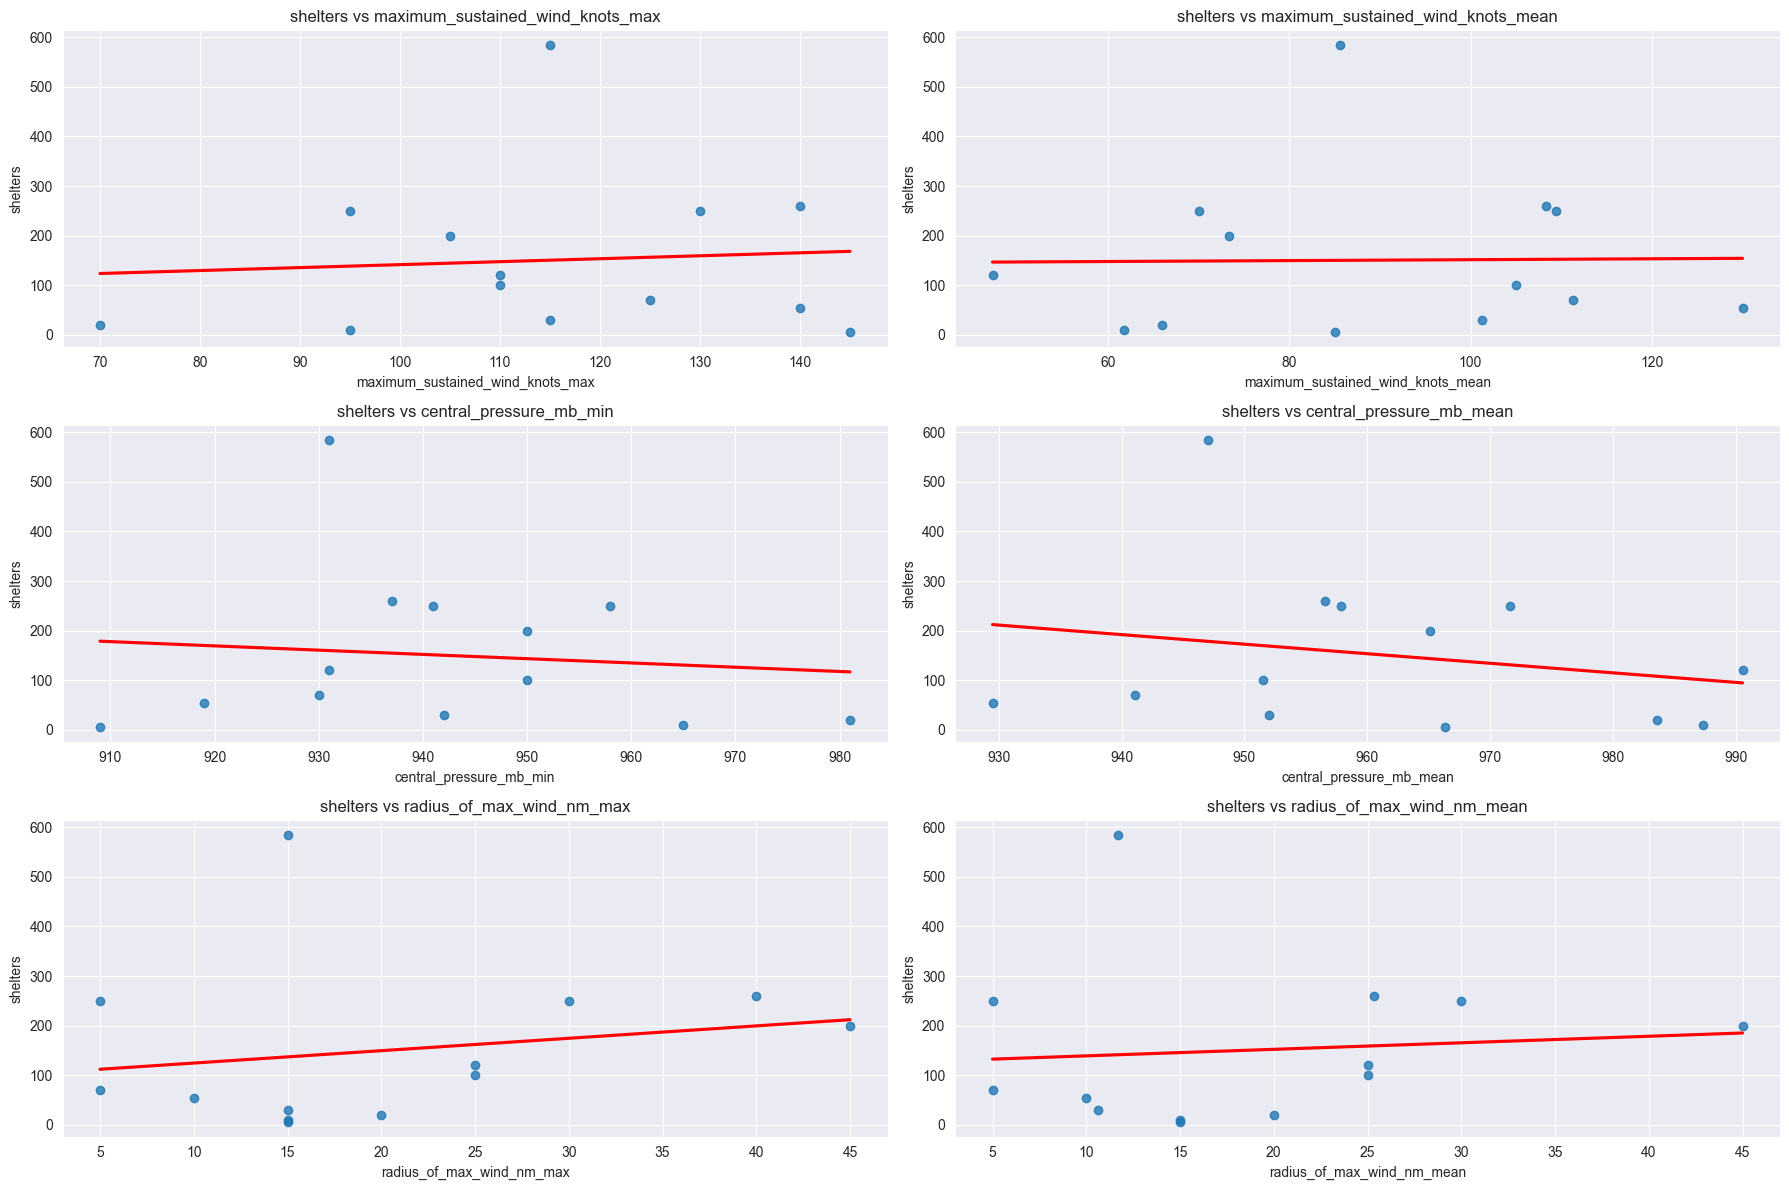

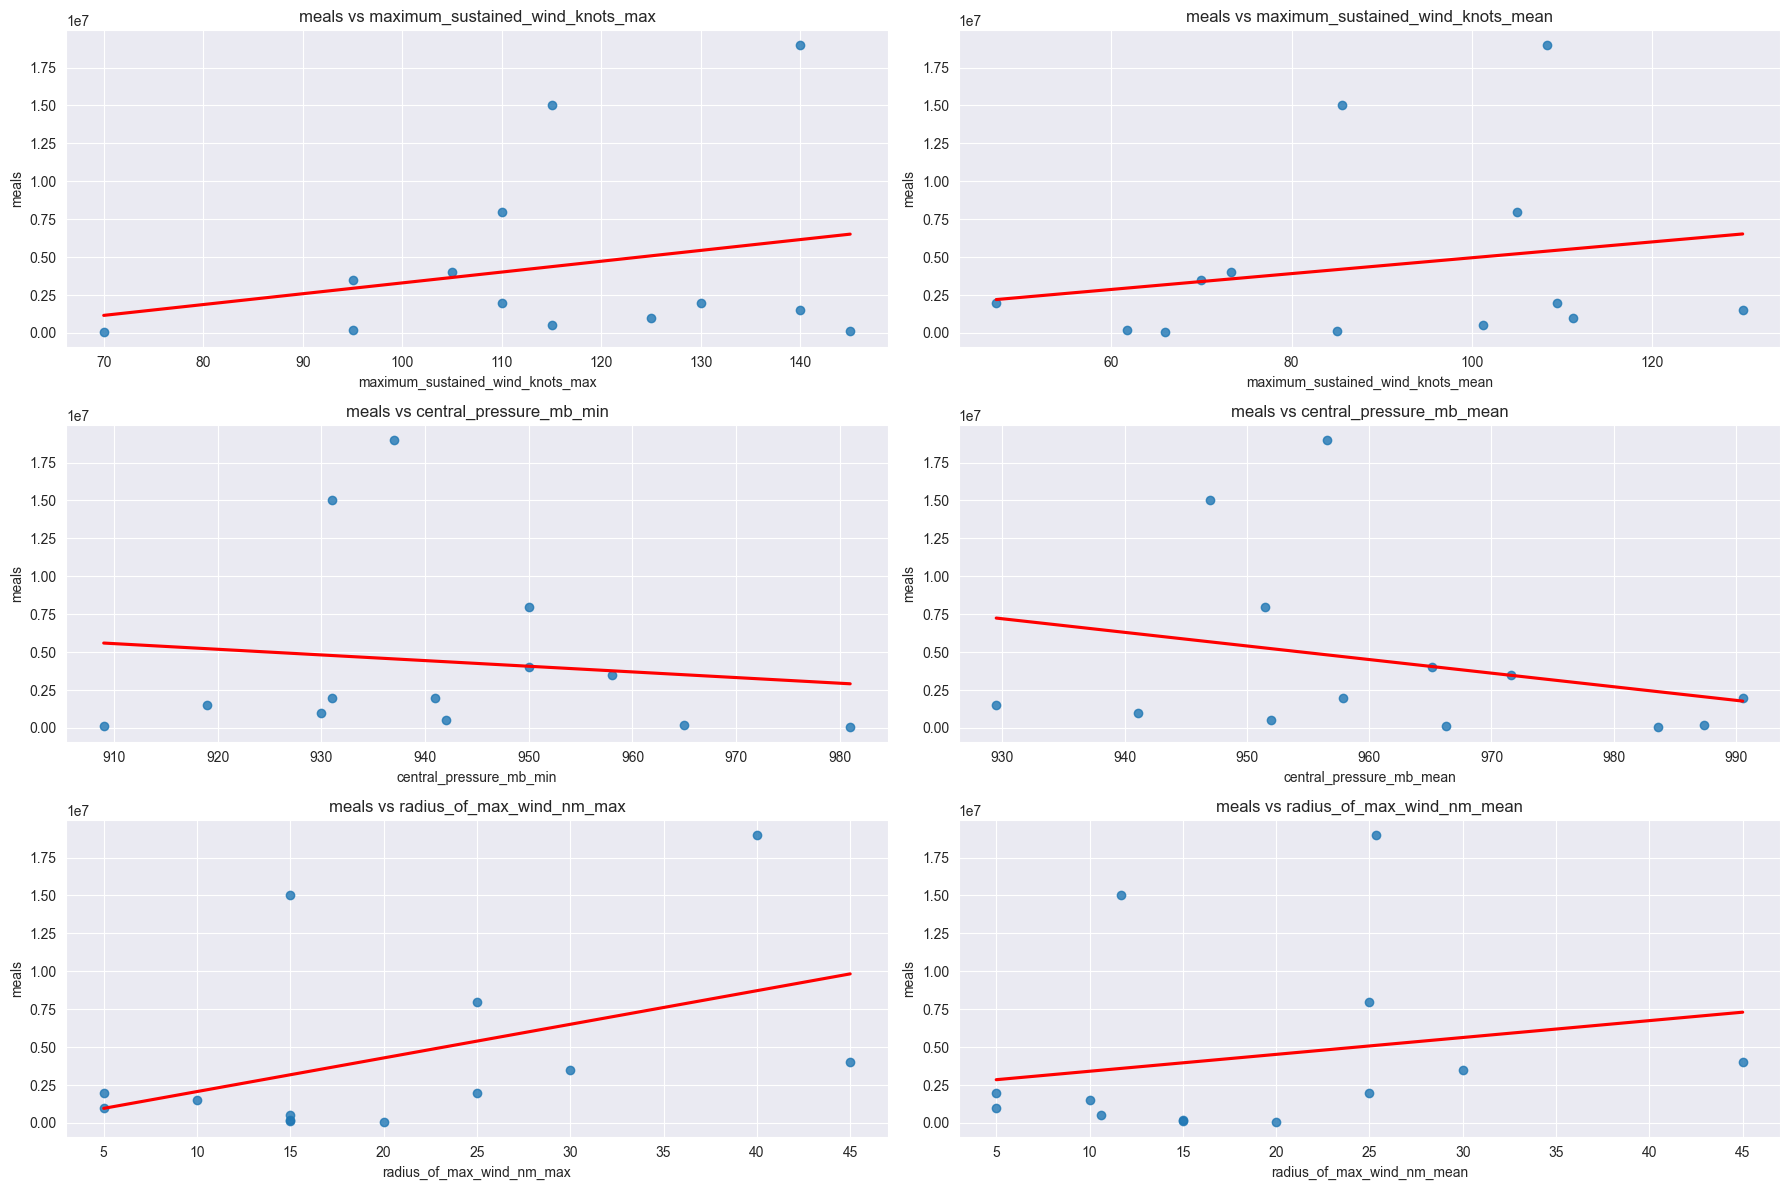

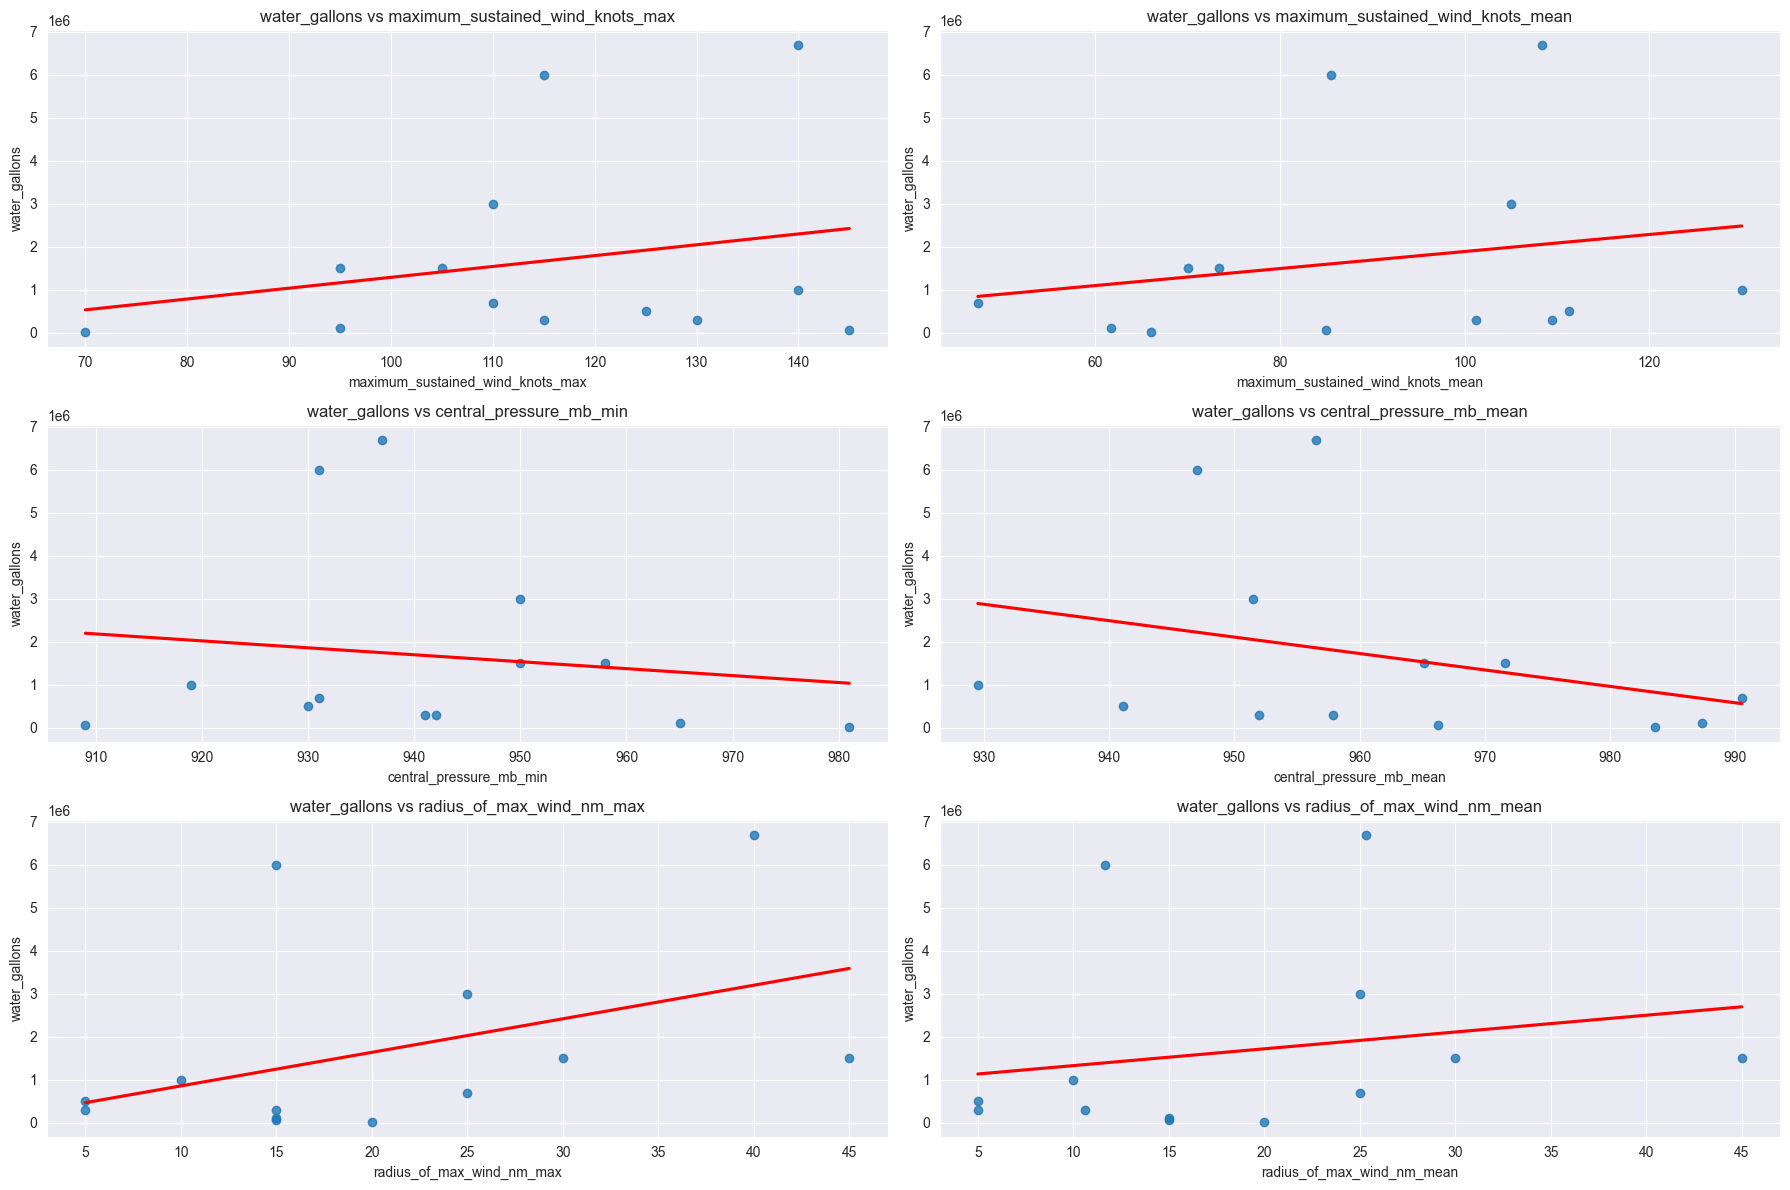

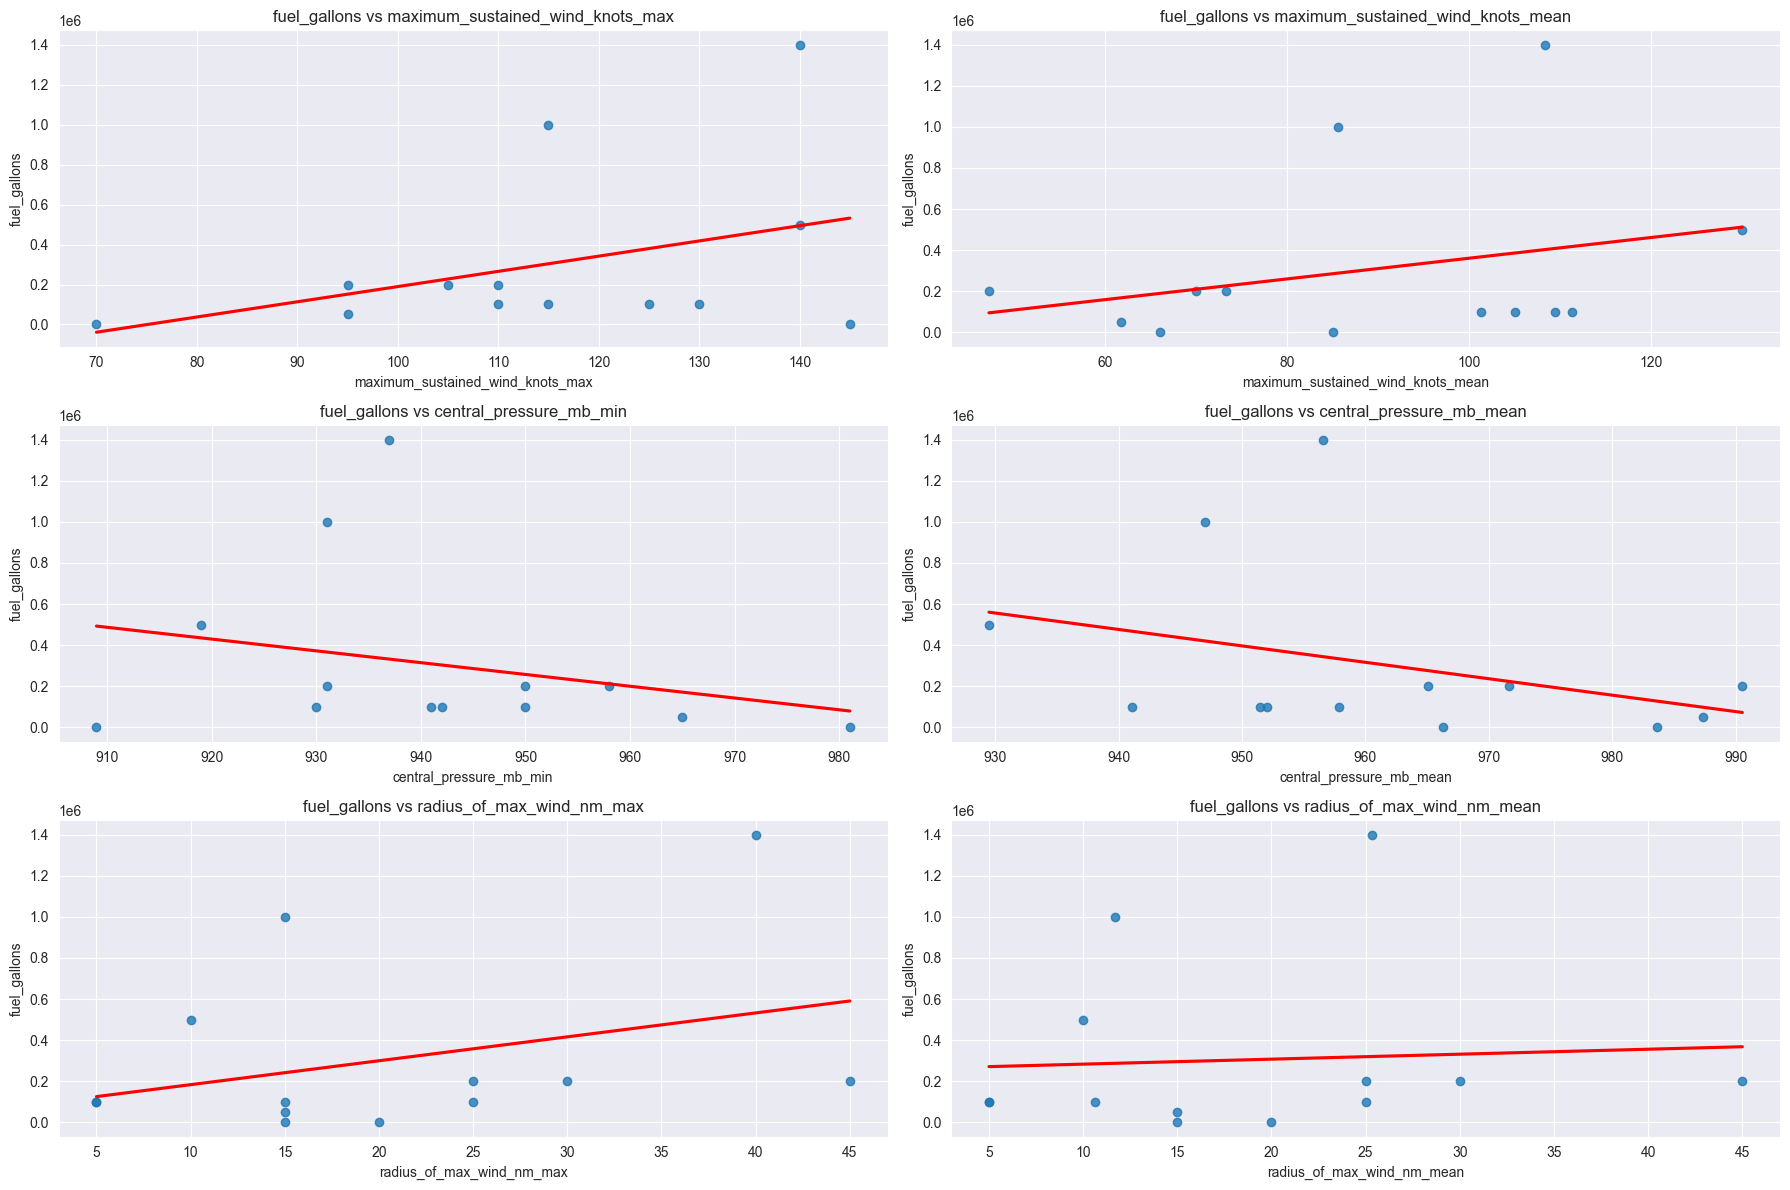

In [50]:
plt.figure(figsize=(8, 6))

x_axis = list(df_resources_with_storm_features.columns[8:])
y_axis = list(df_resources_with_storm_features.columns[3:7])
# y_axis = ['shelters']


for y_feature in y_axis:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

    axes = axes.flatten()
    for i, x_feature in enumerate(x_axis):
        sns.regplot(
            x=df_resources_with_storm_features[x_feature],
            y=df_resources_with_storm_features[y_feature],
            scatter=True,
            fit_reg=True,
            line_kws={'color': 'red'},
            ci=None,
            ax=axes[i]
        )

        axes[i].set_title(f'{y_feature} vs {x_feature}')
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)
    plt.tight_layout()
    plt.show()

# Random Forest(Regression) based Data Synthesis

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the columns to be used for training
X = df_resources_with_storm_features[list(df_resources_with_storm_features.columns[8:])]
Y = df_resources_with_storm_features[list(df_resources_with_storm_features.columns[3:7])]

# Generate splits
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, Y_train)

# Predict
Y_pred = model_random_forest.predict(grouped_df_selected[list(df_resources_with_storm_features.columns[8:])])
Y_pred_df = pd.DataFrame(Y_pred,
                         columns = ['shelters',
                         'meals_millions',
                         'water_million_gallons',
                         'fuel_million_gallons'])

Y_pred_df

,shelters,meals_millions,water_million_gallons,fuel_million_gallons
0,24.25,349000.0,146900.0,50500.0
1,38.65,547500.0,236400.0,47500.0
2,54.05,946000.0,409800.0,89500.0
3,186.60,2907500.0,1195100.0,164500.0
4,52.50,898500.0,391000.0,82500.0
...,...,...,...,...
67,164.80,4283000.0,1762500.0,269500.0
68,244.80,8335000.0,3241000.0,355000.0
69,179.60,3044500.0,1196500.0,180000.0
70,18.35,289000.0,135700.0,51000.0


Plot graph to check trends

<Figure size 800x600 with 0 Axes>

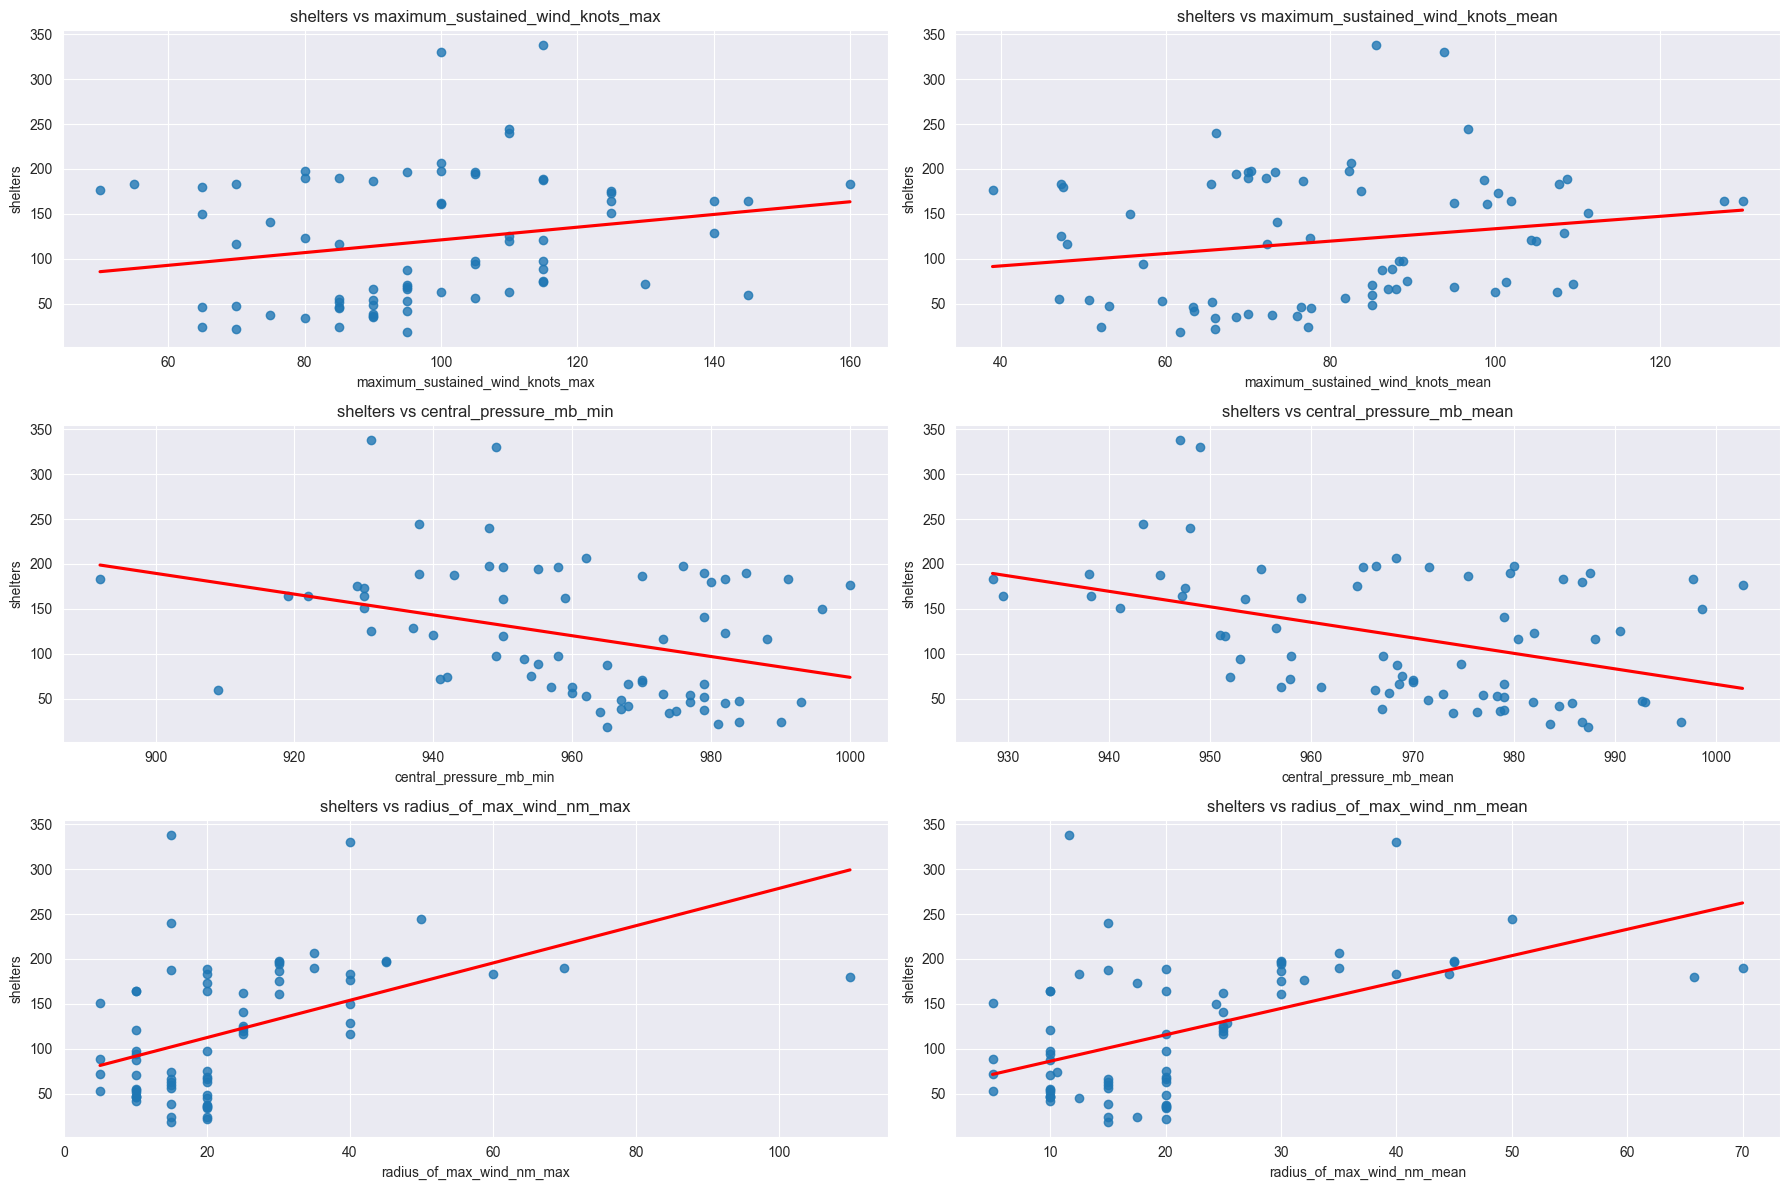

KeyError: 'meals'

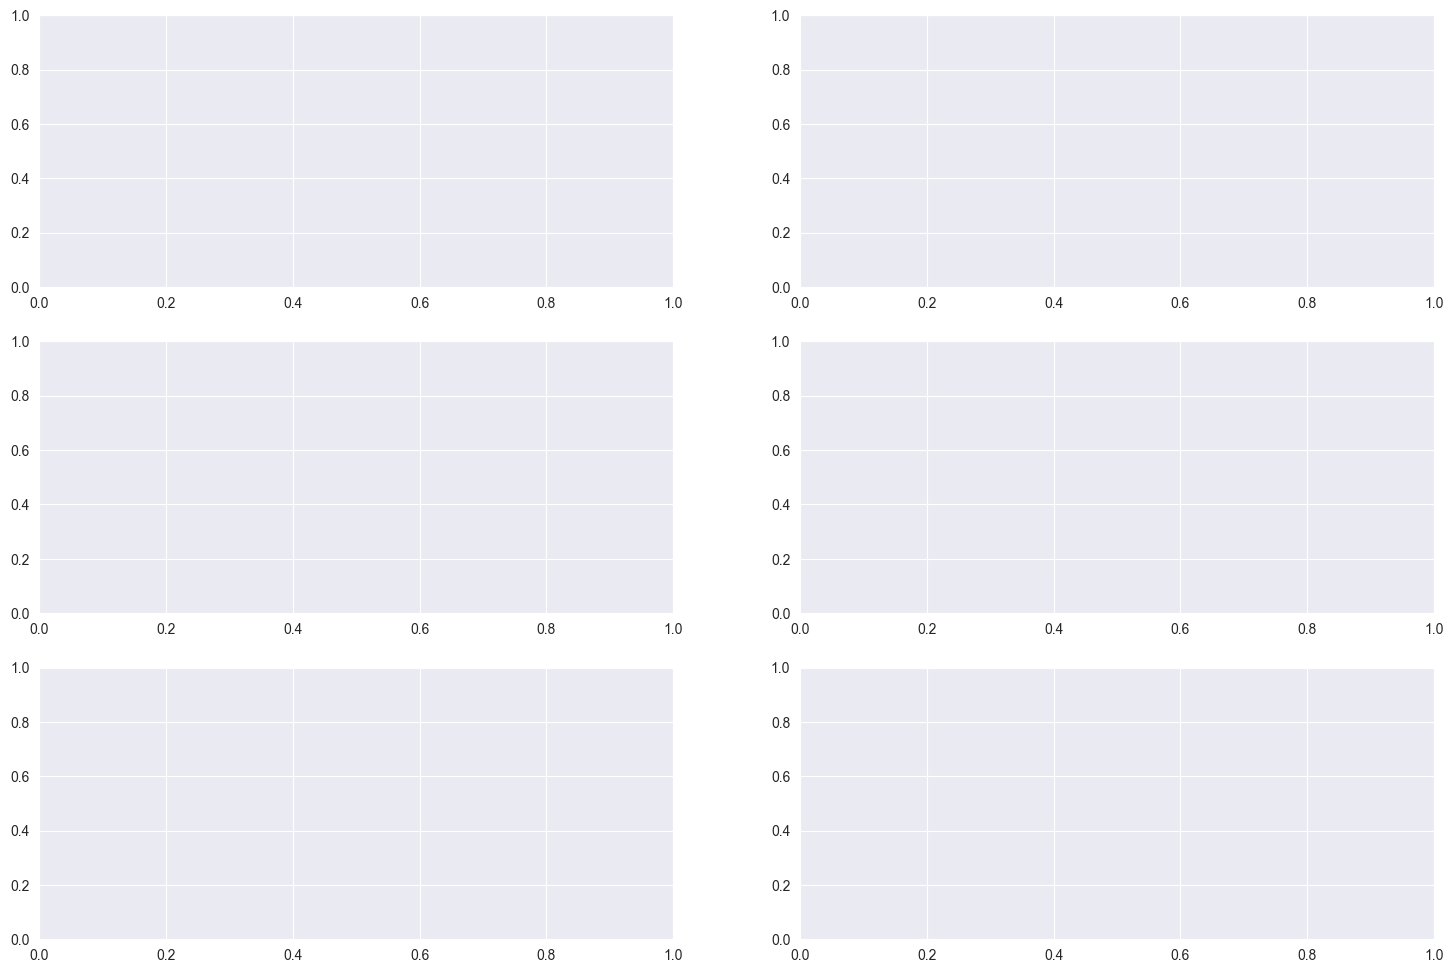

In [52]:
plt.figure(figsize=(8, 6))

x_axis = list(df_resources_with_storm_features.columns[8:])
y_axis = list(df_resources_with_storm_features.columns[3:7])

for y_feature in y_axis:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

    axes = axes.flatten()
    for i, x_feature in enumerate(x_axis):
        sns.regplot(
            x=grouped_df_selected[x_feature],
            y=Y_pred_df[y_feature],
            scatter=True,
            fit_reg=True,
            line_kws={'color': 'red'},
            ci=None,
            ax=axes[i]
        )

        axes[i].set_title(f'{y_feature} vs {x_feature}')
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)
    plt.tight_layout()
    plt.show()